In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

In [2]:
df = pd.read_csv('train.csv')
df.pickup_datetime=pd.to_datetime(df.pickup_datetime)
df.dropoff_datetime=pd.to_datetime(df.dropoff_datetime)
df['pu_hour'] = df.pickup_datetime.dt.hour
df['yday'] = df.pickup_datetime.dt.dayofyear
df['wday'] = df.pickup_datetime.dt.dayofweek

In [3]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pu_hour,yday,wday
0,id3495688,1,2016-04-30 23:59:00,2016-05-01 00:24:00,1,-73.987793,40.724792,-73.975616,40.656445,N,1454,23,121,5
1,id3051282,1,2016-04-30 23:59:00,2016-05-01 00:22:00,1,-73.957596,40.717770,-73.951424,40.775230,N,1409,23,121,5
2,id0082851,1,2016-04-30 23:59:00,2016-05-01 00:17:00,2,-74.000954,40.742031,-73.947708,40.782200,N,1081,23,121,5
3,id0515725,2,2016-04-30 23:58:00,2016-05-01 00:12:00,1,-73.985733,40.738258,-73.993179,40.754890,N,800,23,121,5
4,id1872374,2,2016-04-30 23:58:00,2016-05-01 00:17:00,1,-74.006615,40.740650,-73.985619,40.723362,N,1151,23,121,5


In [4]:
wdf = pd.read_csv('weather_data_nyc_centralpark_2016.csv')

In [5]:
wdf['date']=pd.to_datetime(wdf.date,format='%d-%m-%Y')
wdf['yday'] = wdf.date.dt.dayofyear

In [6]:
wdf.head(80)

,date,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth,yday
0,2016-01-01,42,34,38.0,0.00,0.0,0,1
1,2016-01-02,40,32,36.0,0.00,0.0,0,2
2,2016-01-03,45,35,40.0,0.00,0.0,0,3
3,2016-01-04,36,14,25.0,0.00,0.0,0,4
4,2016-01-05,29,11,20.0,0.00,0.0,0,5
5,2016-01-06,41,25,33.0,0.00,0.0,0,6
6,2016-01-07,46,31,38.5,0.00,0.0,0,7
7,2016-01-08,46,31,38.5,0.00,0.0,0,8
8,2016-01-09,47,40,43.5,T,0.0,0,9
9,2016-01-10,59,40,49.5,1.80,0.0,0,10


In [7]:
falls = [ 0.01 if c=='T' else float(c) for c in wdf['snow fall']]
rain = [ 0.01 if c=='T' else float(c) for c in wdf['precipitation']]
wdf['snow fall']= falls
wdf['precipitation'] = rain

In [8]:
wdf['precipitation']

0      0.00
1      0.00
2      0.00
3      0.00
4      0.00
5      0.00
6      0.00
7      0.00
8      0.01
9      1.80
10     0.00
11     0.00
12     0.00
13     0.00
14     0.01
15     0.24
16     0.05
17     0.01
18     0.00
19     0.00
20     0.00
21     0.01
22     2.31
23     0.01
24     0.00
25     0.00
26     0.01
27     0.00
28     0.00
29     0.00
       ... 
336    0.00
337    0.01
338    0.00
339    0.19
340    0.35
341    0.09
342    0.00
343    0.00
344    0.00
345    0.03
346    0.50
347    0.00
348    0.00
349    0.00
350    0.00
351    0.73
352    0.04
353    0.00
354    0.00
355    0.00
356    0.00
357    0.00
358    0.47
359    0.00
360    0.02
361    0.00
362    0.00
363    0.39
364    0.01
365    0.00
Name: precipitation, Length: 366, dtype: float64

In [9]:
df = pd.merge(df,wdf,on='yday')
df.head(23)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pu_hour,yday,wday,date,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth
0,id3495688,1,2016-04-30 23:59:00,2016-05-01 00:24:00,1,-73.987793,40.724792,-73.975616,40.656445,N,...,23,121,5,2016-04-30,65,46,55.5,0.0,0.0,0
1,id3051282,1,2016-04-30 23:59:00,2016-05-01 00:22:00,1,-73.957596,40.717770,-73.951424,40.775230,N,...,23,121,5,2016-04-30,65,46,55.5,0.0,0.0,0
2,id0082851,1,2016-04-30 23:59:00,2016-05-01 00:17:00,2,-74.000954,40.742031,-73.947708,40.782200,N,...,23,121,5,2016-04-30,65,46,55.5,0.0,0.0,0
3,id0515725,2,2016-04-30 23:58:00,2016-05-01 00:12:00,1,-73.985733,40.738258,-73.993179,40.754890,N,...,23,121,5,2016-04-30,65,46,55.5,0.0,0.0,0
4,id1872374,2,2016-04-30 23:58:00,2016-05-01 00:17:00,1,-74.006615,40.740650,-73.985619,40.723362,N,...,23,121,5,2016-04-30,65,46,55.5,0.0,0.0,0
5,id0312189,1,2016-04-30 23:58:00,2016-05-01 00:25:00,2,-73.997253,40.719234,-73.993835,40.762051,N,...,23,121,5,2016-04-30,65,46,55.5,0.0,0.0,0
6,id1462929,1,2016-04-30 23:58:00,2016-05-01 00:34:00,1,-73.994537,40.753037,-73.961098,40.687229,N,...,23,121,5,2016-04-30,65,46,55.5,0.0,0.0,0
7,id3799362,1,2016-04-30 23:58:00,2016-05-01 00:39:00,1,-73.873055,40.774086,-74.006378,40.738487,N,...,23,121,5,2016-04-30,65,46,55.5,0.0,0.0,0
8,id3607754,2,2016-04-30 23:58:00,2016-05-01 00:24:00,2,-73.980354,40.780540,-73.943390,40.835976,N,...,23,121,5,2016-04-30,65,46,55.5,0.0,0.0,0
9,id1733007,2,2016-04-30 23:58:00,2016-05-01 00:37:00,6,-73.782448,40.644691,-73.926926,40.703735,N,...,23,121,5,2016-04-30,65,46,55.5,0.0,0.0,0


In [16]:
df = df.drop(['date','maximum temperature','minimum temperature'], axis=1)
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pu_hour,yday,wday,average temperature,precipitation,snow fall,snow depth
0,id3495688,1,2016-04-30 23:59:00,2016-05-01 00:24:00,1,-73.987793,40.724792,-73.975616,40.656445,N,1454,23,121,5,55.5,0.0,0.0,0
1,id3051282,1,2016-04-30 23:59:00,2016-05-01 00:22:00,1,-73.957596,40.717770,-73.951424,40.775230,N,1409,23,121,5,55.5,0.0,0.0,0
2,id0082851,1,2016-04-30 23:59:00,2016-05-01 00:17:00,2,-74.000954,40.742031,-73.947708,40.782200,N,1081,23,121,5,55.5,0.0,0.0,0
3,id0515725,2,2016-04-30 23:58:00,2016-05-01 00:12:00,1,-73.985733,40.738258,-73.993179,40.754890,N,800,23,121,5,55.5,0.0,0.0,0
4,id1872374,2,2016-04-30 23:58:00,2016-05-01 00:17:00,1,-74.006615,40.740650,-73.985619,40.723362,N,1151,23,121,5,55.5,0.0,0.0,0


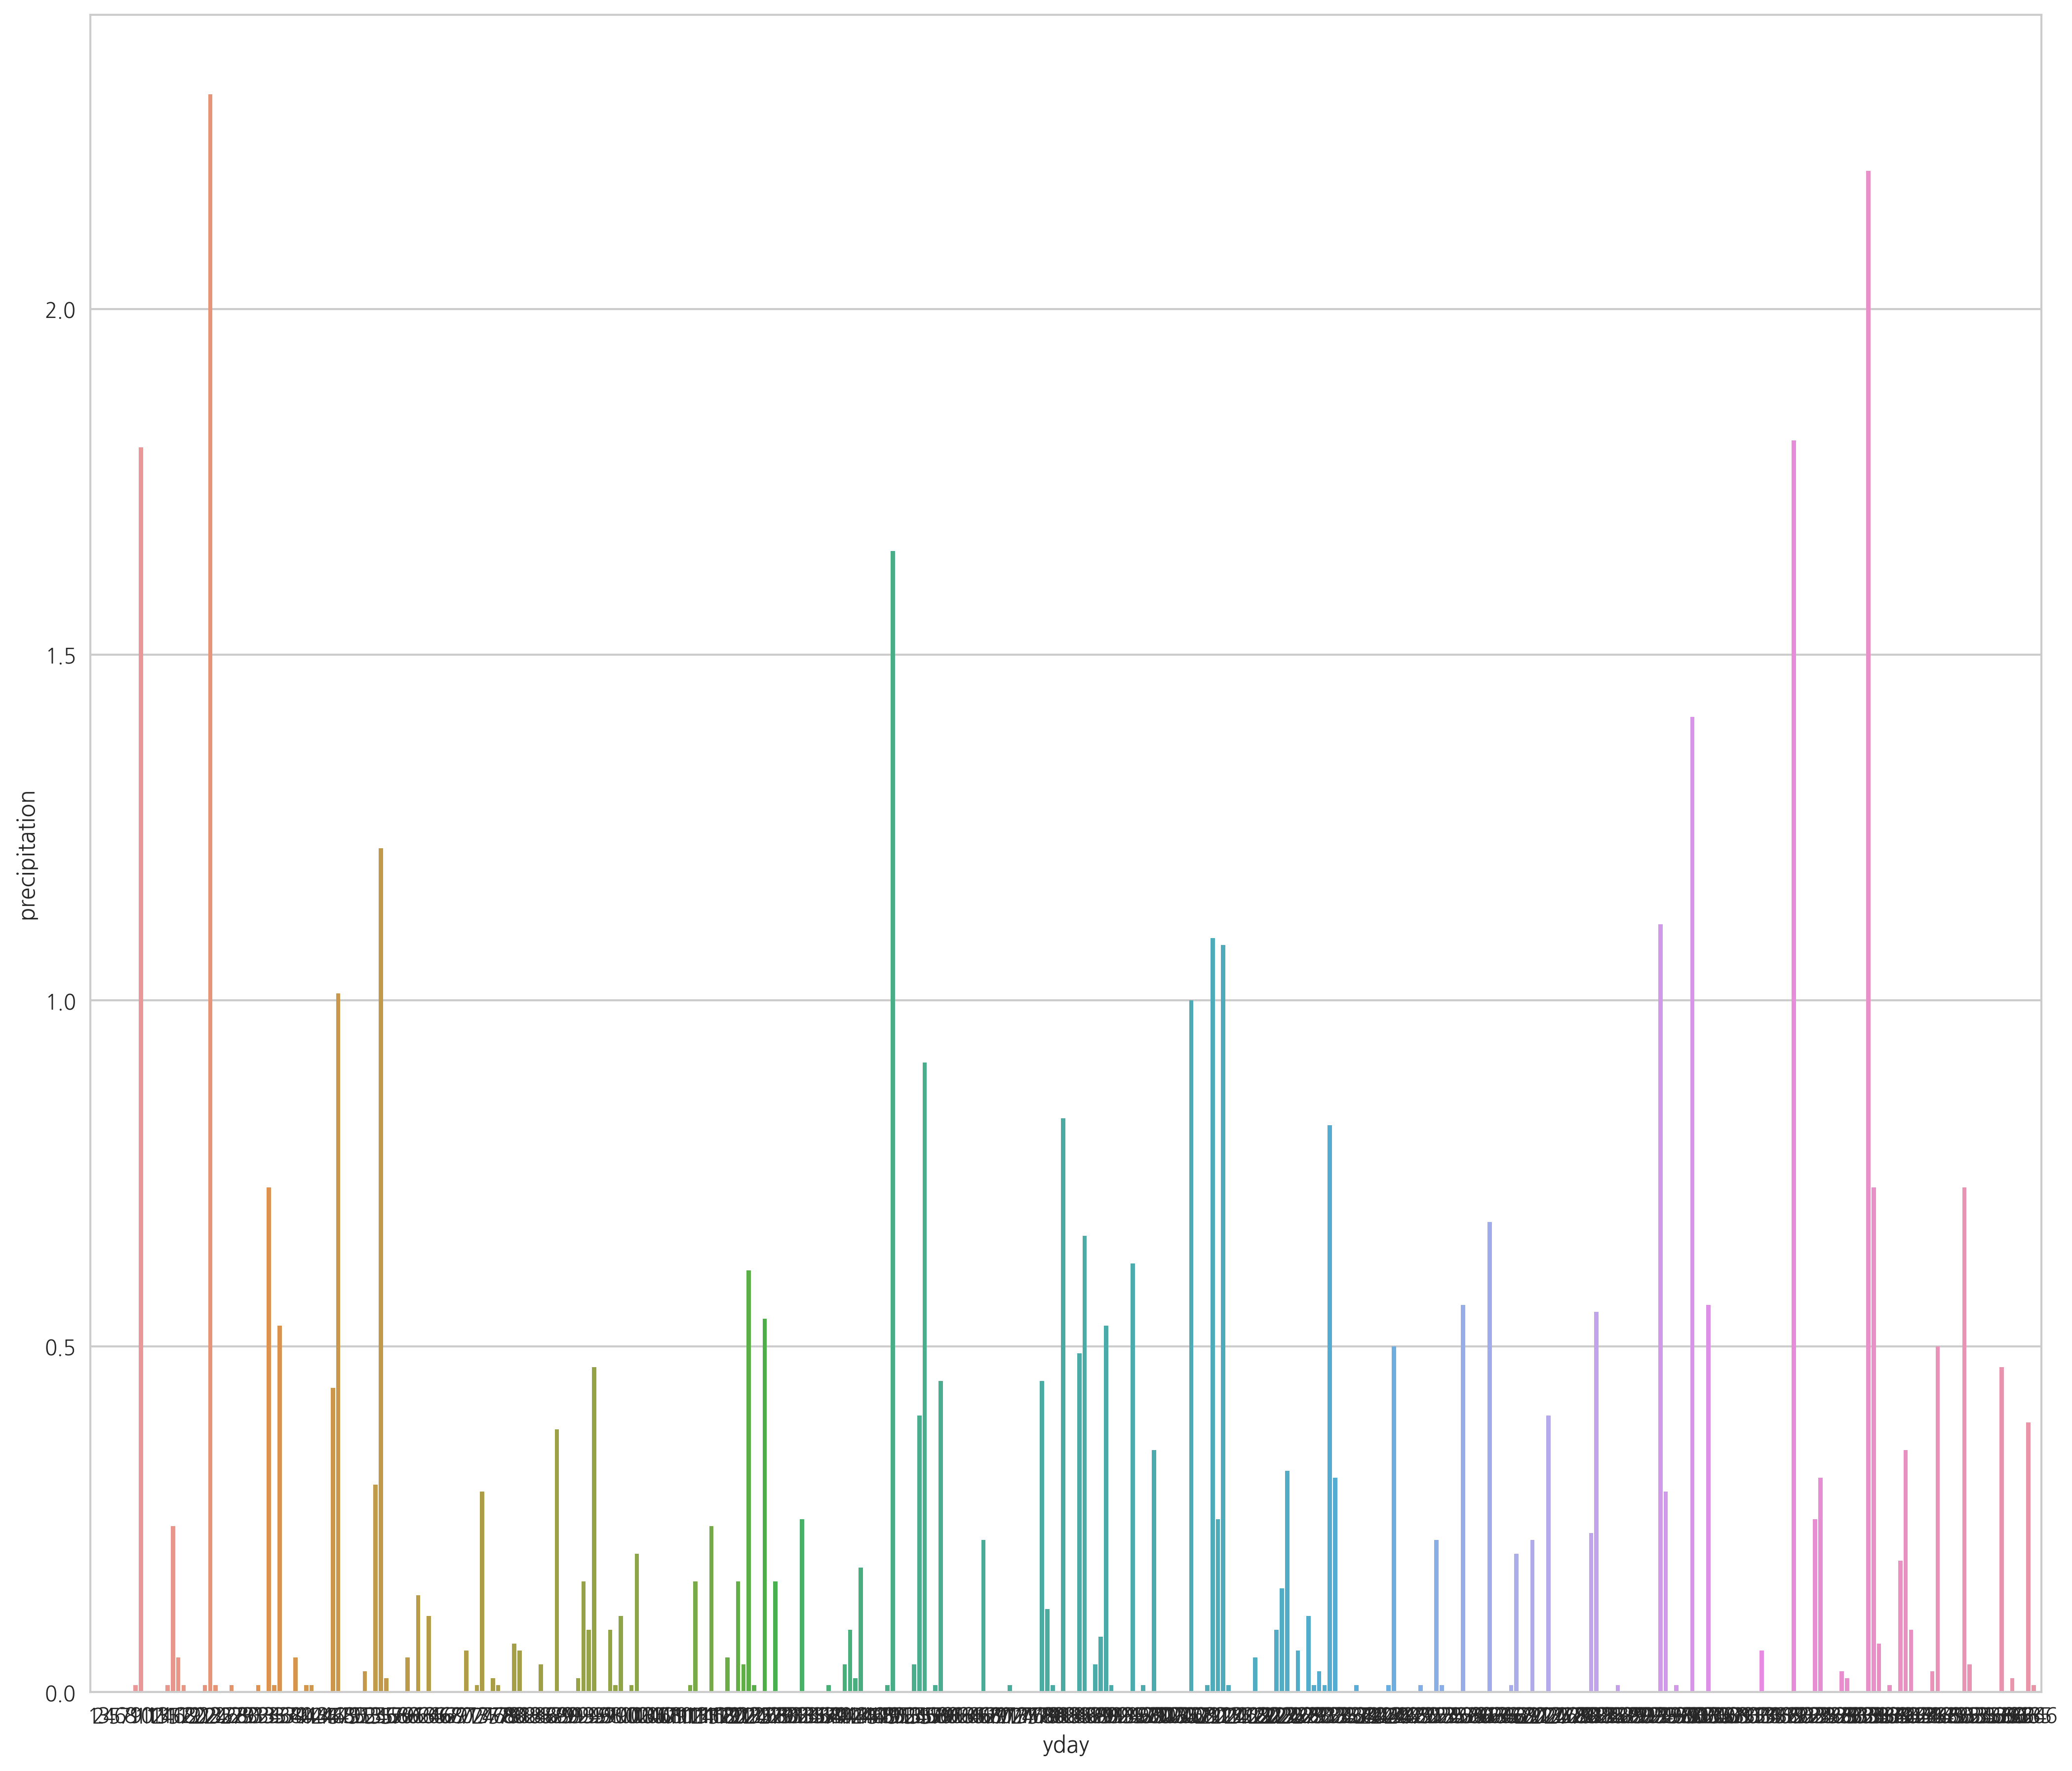

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(1,1,figsize=(17,15))
rain = wdf['precipitation']
sns.barplot(wdf['yday'], rain)

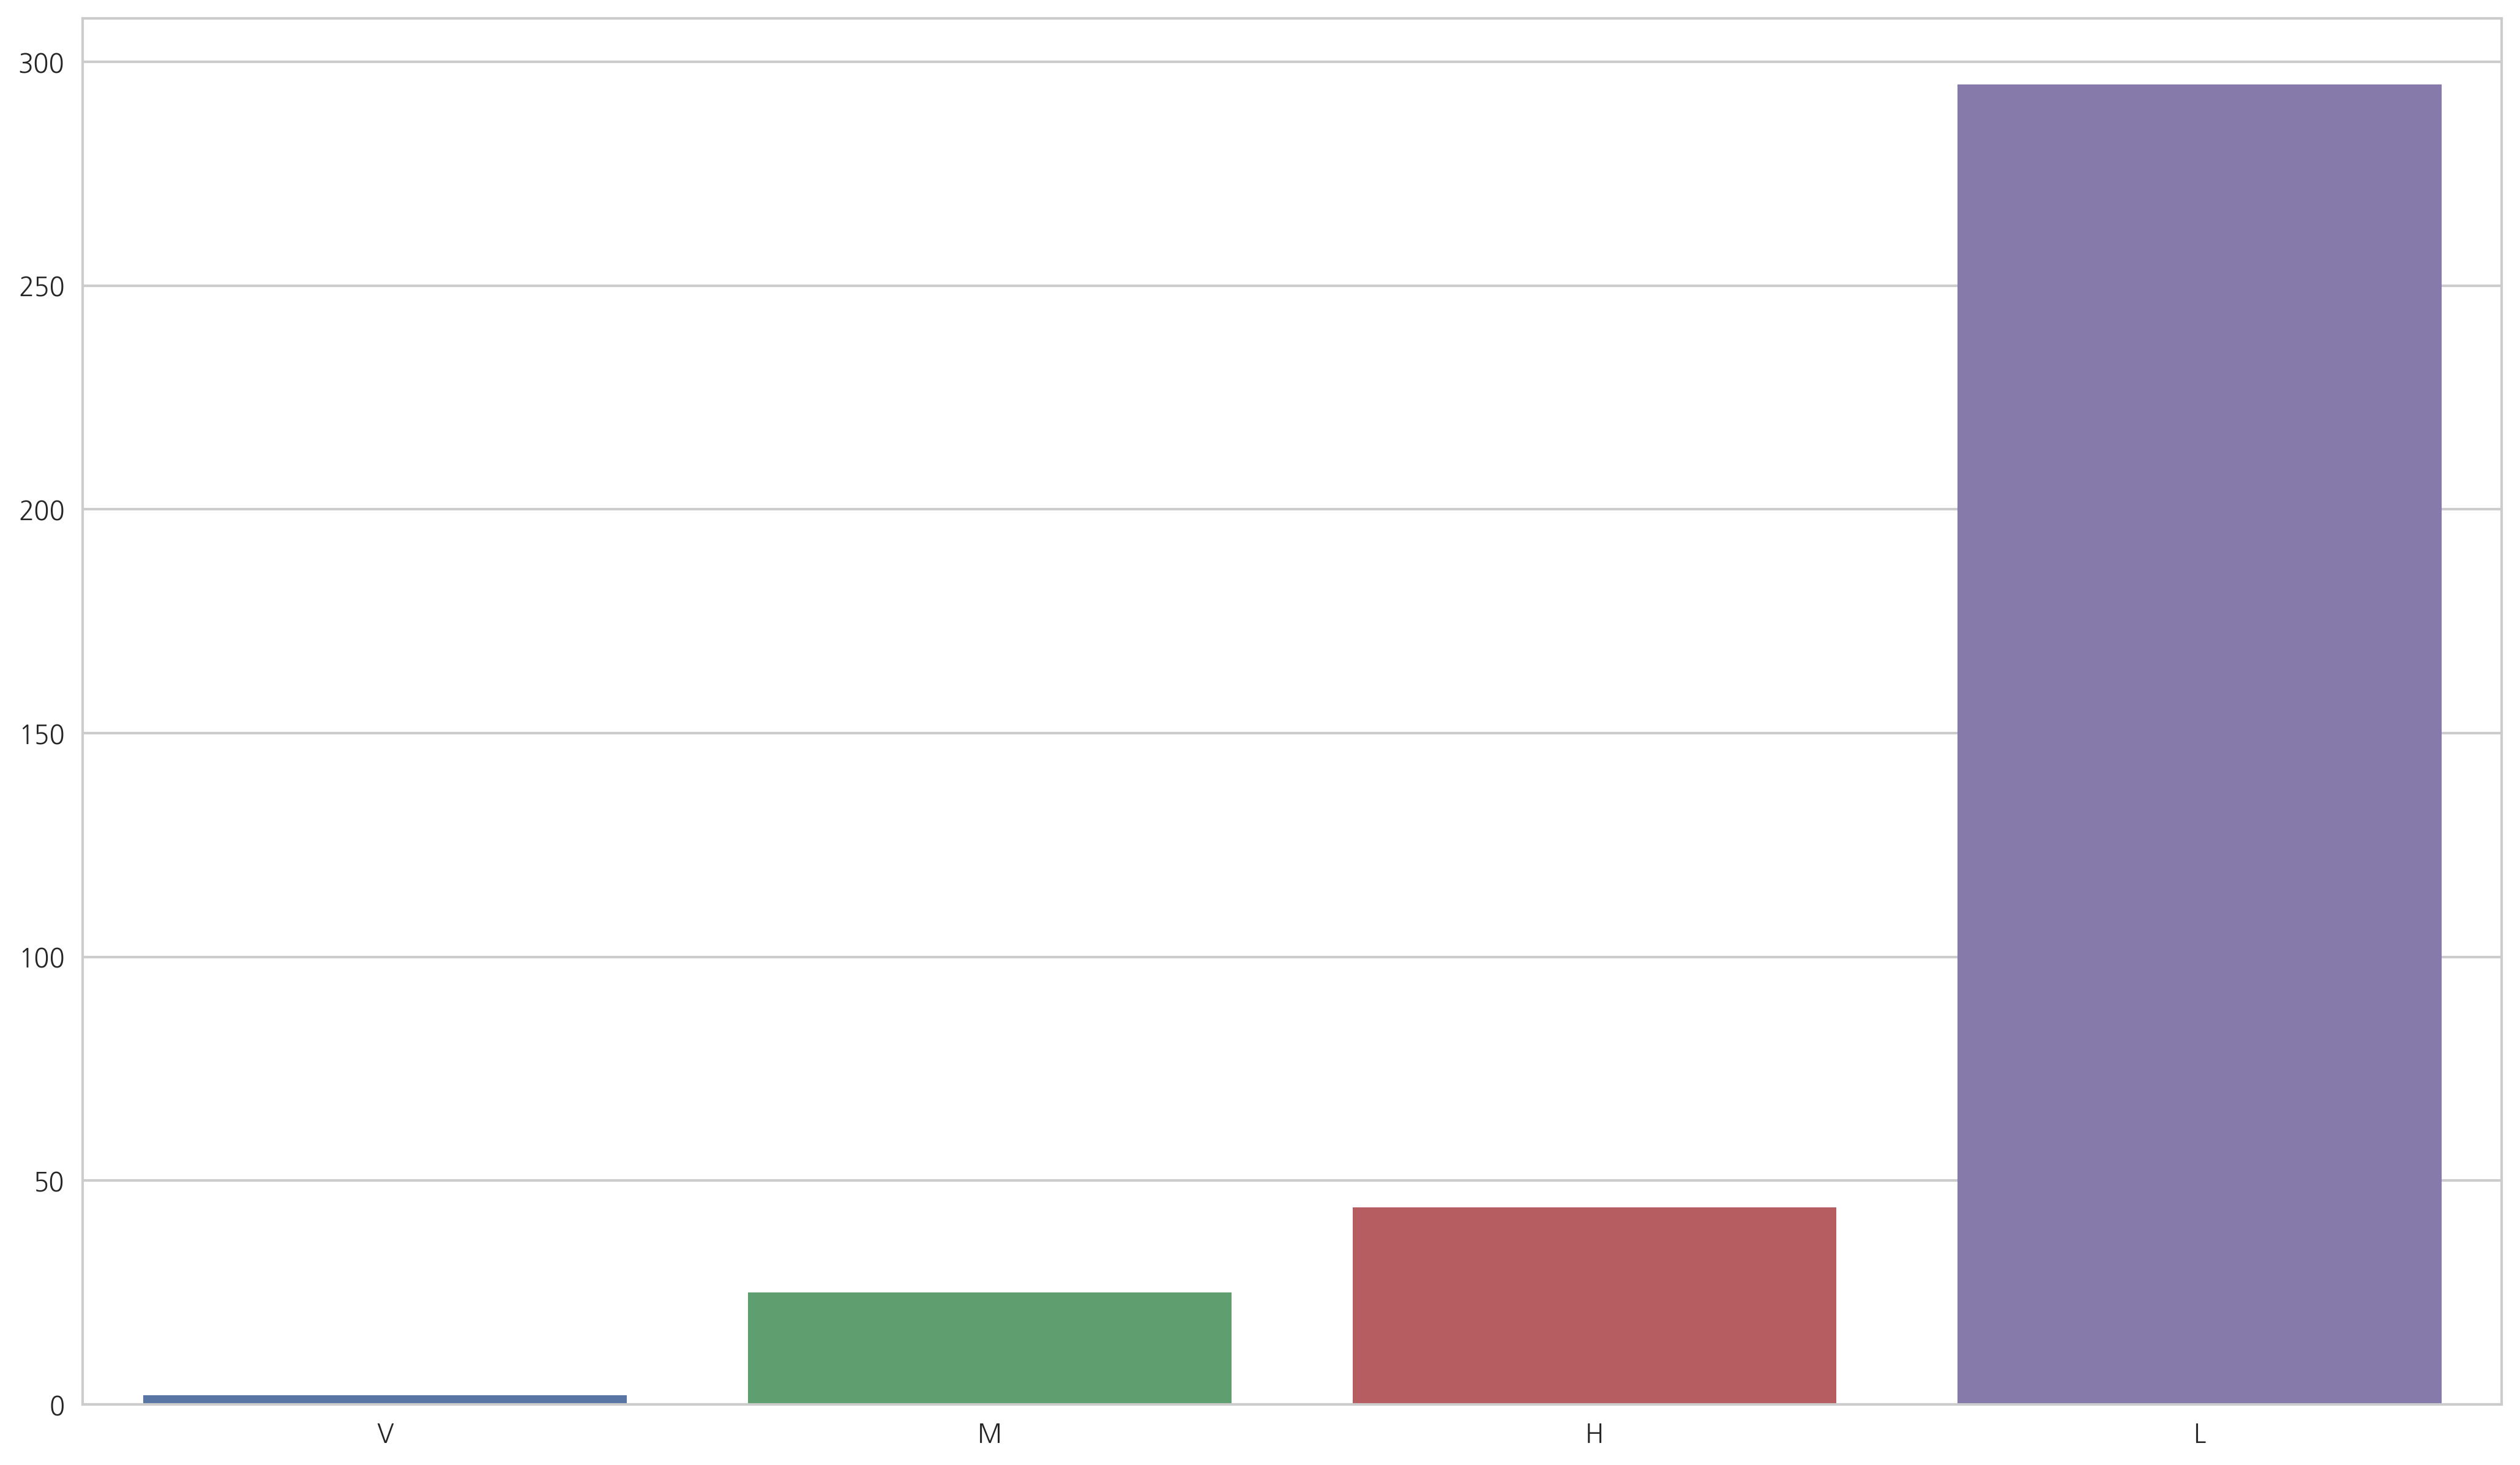

In [18]:
intensity = wdf['precipitation'].apply(lambda x:'L' if x < 0.098 
                           else 'M' if x>=0.098 and x<0.30 
                           else 'H' if x>=0.30 and x<2.0
                           else 'V')
wdf['precipitation'] = intensity
rain_count = wdf['precipitation'].value_counts().sort_values()
plt.subplots(1,1,figsize=(17,10))
sns.barplot(rain_count.index,rain_count.values)

In [19]:
rain_dummies = pd.get_dummies(wdf['precipitation'])
df = pd.concat([df, rain_dummies], axis=1)
df = df.drop(['precipitation'],axis=1)

In [20]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pu_hour,yday,wday,average temperature,snow fall,snow depth,H,L,M,V
0,id3495688,1,2016-04-30 23:59:00,2016-05-01 00:24:00,1,-73.987793,40.724792,-73.975616,40.656445,N,...,23,121,5,55.5,0.0,0,0.0,1.0,0.0,0.0
1,id3051282,1,2016-04-30 23:59:00,2016-05-01 00:22:00,1,-73.957596,40.717770,-73.951424,40.775230,N,...,23,121,5,55.5,0.0,0,0.0,1.0,0.0,0.0
2,id0082851,1,2016-04-30 23:59:00,2016-05-01 00:17:00,2,-74.000954,40.742031,-73.947708,40.782200,N,...,23,121,5,55.5,0.0,0,0.0,1.0,0.0,0.0
3,id0515725,2,2016-04-30 23:58:00,2016-05-01 00:12:00,1,-73.985733,40.738258,-73.993179,40.754890,N,...,23,121,5,55.5,0.0,0,0.0,1.0,0.0,0.0
4,id1872374,2,2016-04-30 23:58:00,2016-05-01 00:17:00,1,-74.006615,40.740650,-73.985619,40.723362,N,...,23,121,5,55.5,0.0,0,0.0,1.0,0.0,0.0


## Locations

In [21]:
day =1
df_day=df[((df.pickup_datetime<'2016-02-'+str(day+1))&
           (df.pickup_datetime>='2016-02-'+str(day)))]

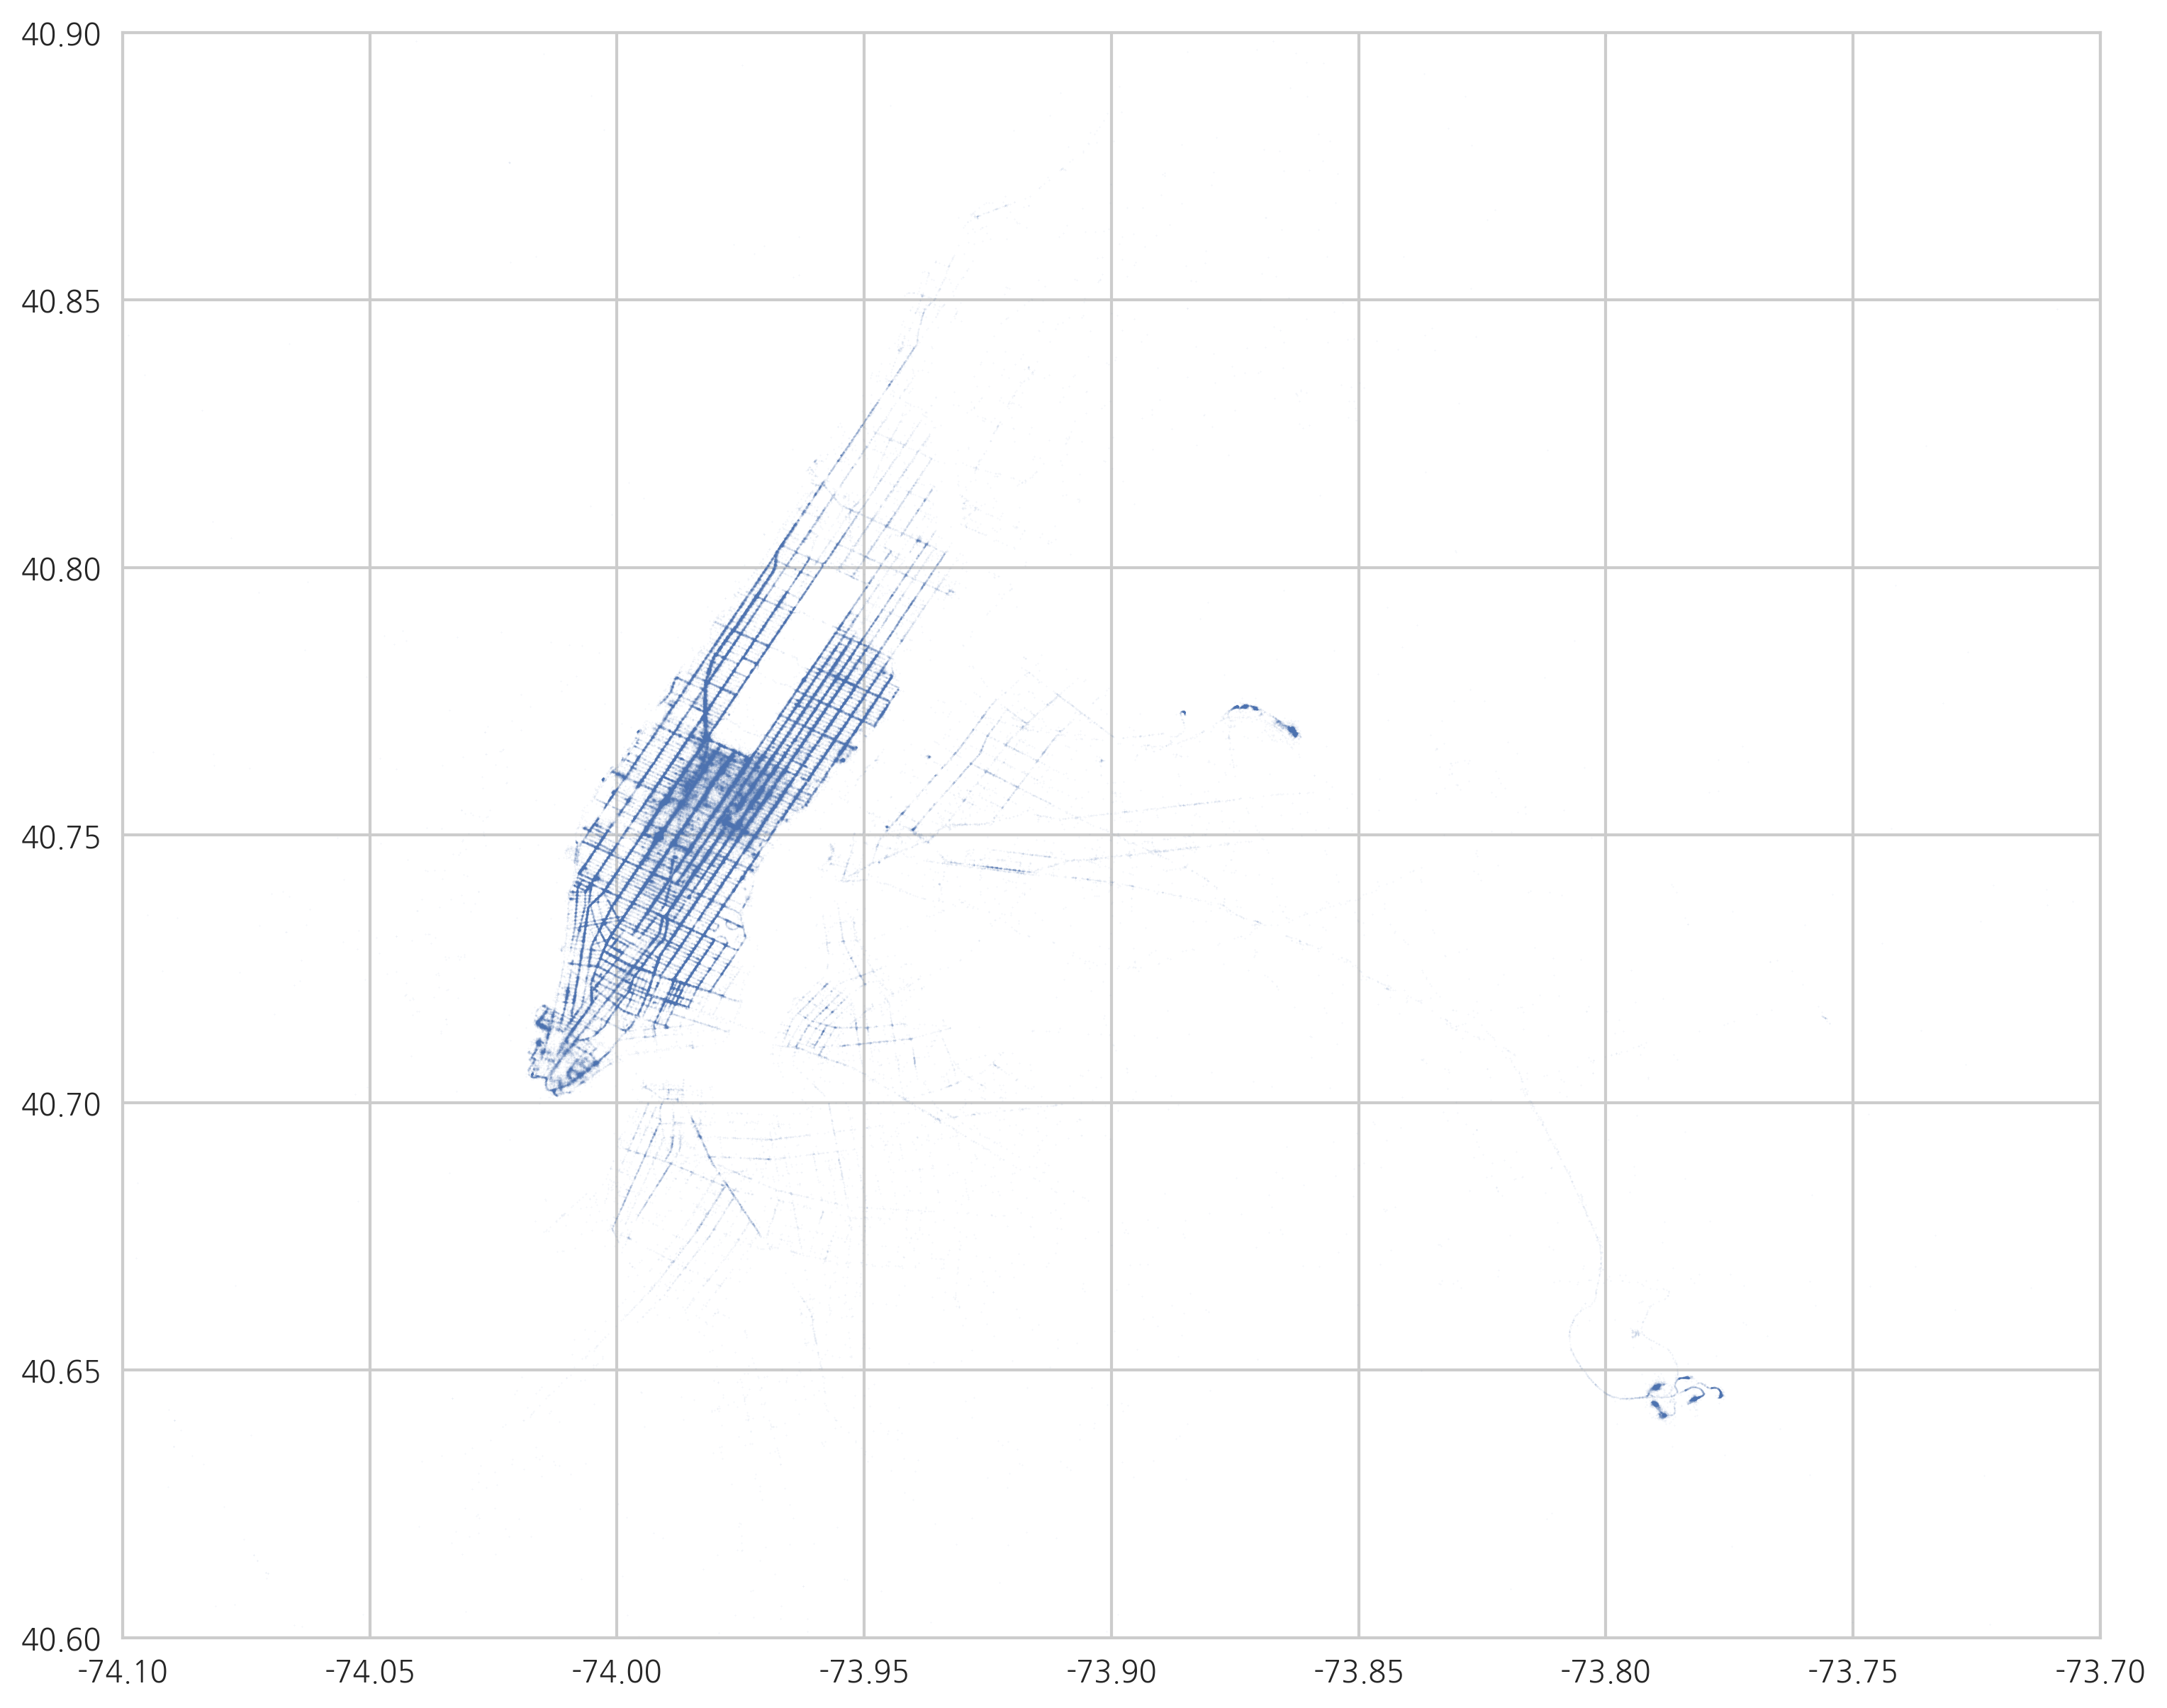

In [22]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(ncols=1, nrows=1,figsize=(12,10))
plt.ylim(40.6, 40.9)
plt.xlim(-74.1,-73.7)
ax.scatter(df['pickup_longitude'],df['pickup_latitude'], s=0.0002, alpha=1)

## Distances

As described in this great kernel https://www.kaggle.com/skhemka/exploratory-data-analysis there are outliers in the trip distances so we remove them.

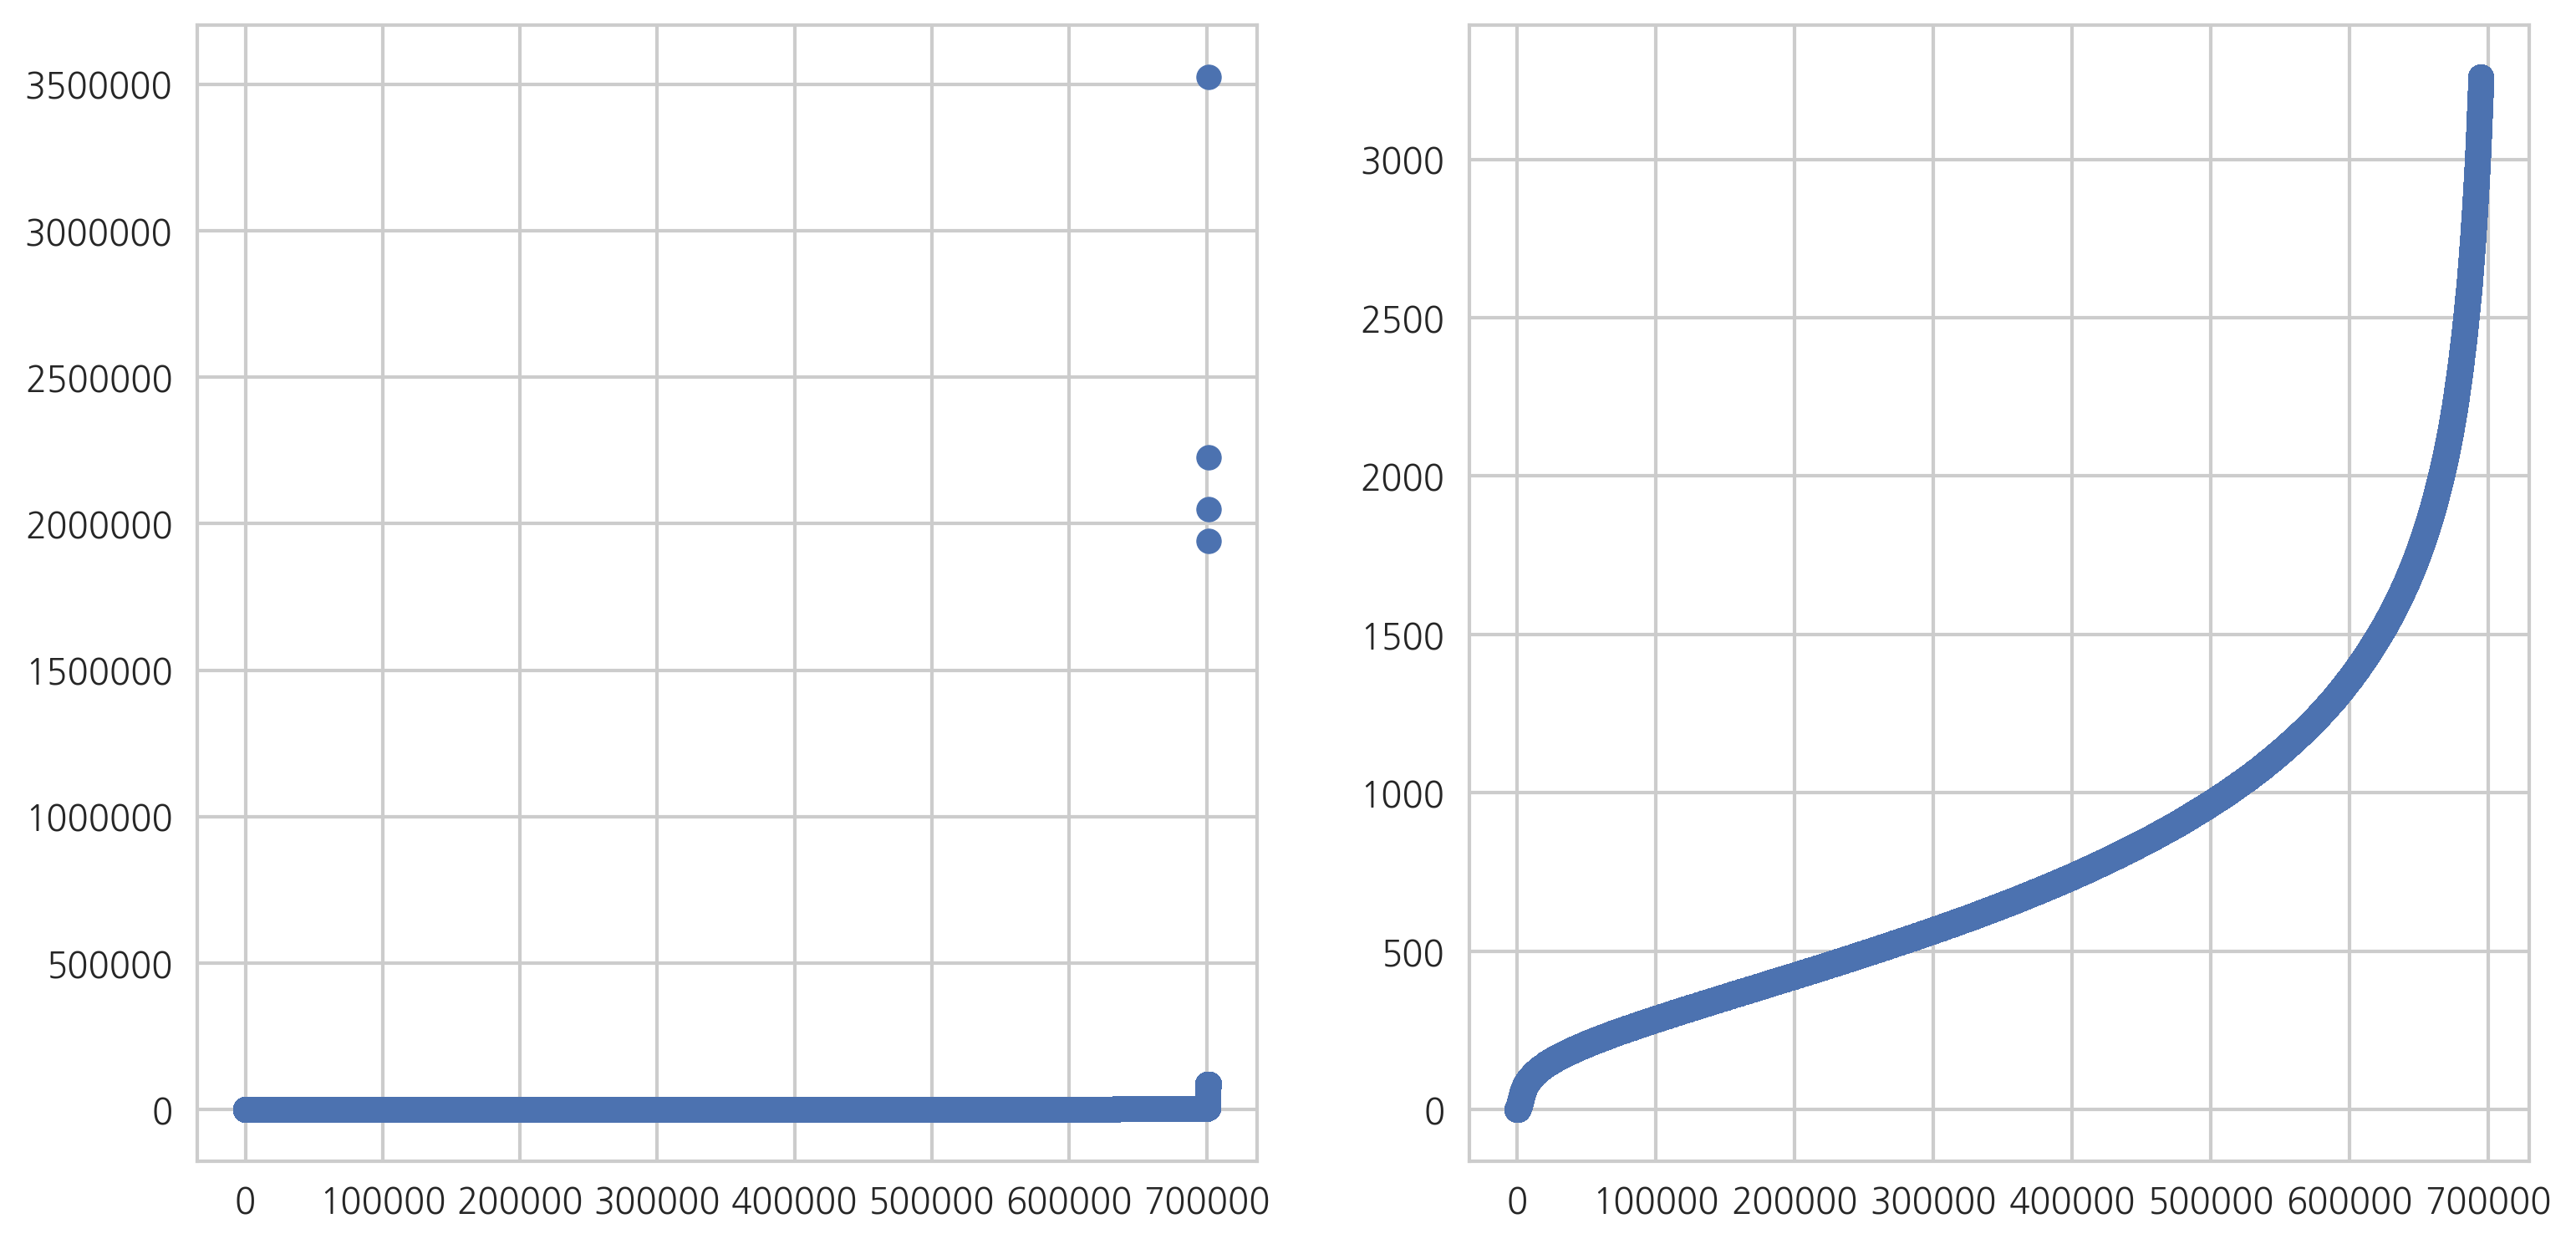

In [23]:
#plt.figure(figsize=(8,6))
f,axarr = plt.subplots(ncols=2,nrows=1,figsize=(12,6))
axarr[0].scatter(range(df.shape[0]), np.sort(df.trip_duration.values))
q = df.trip_duration.quantile(0.99)
df = df[df.trip_duration < q]
axarr[1].scatter(range(df.shape[0]), np.sort(df.trip_duration.values))

plt.show()

and compute the distance

In [24]:
def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [25]:
df['distance'] = haversine_np(df.pickup_longitude, df.pickup_latitude,
                                           df.dropoff_longitude, df.dropoff_latitude)

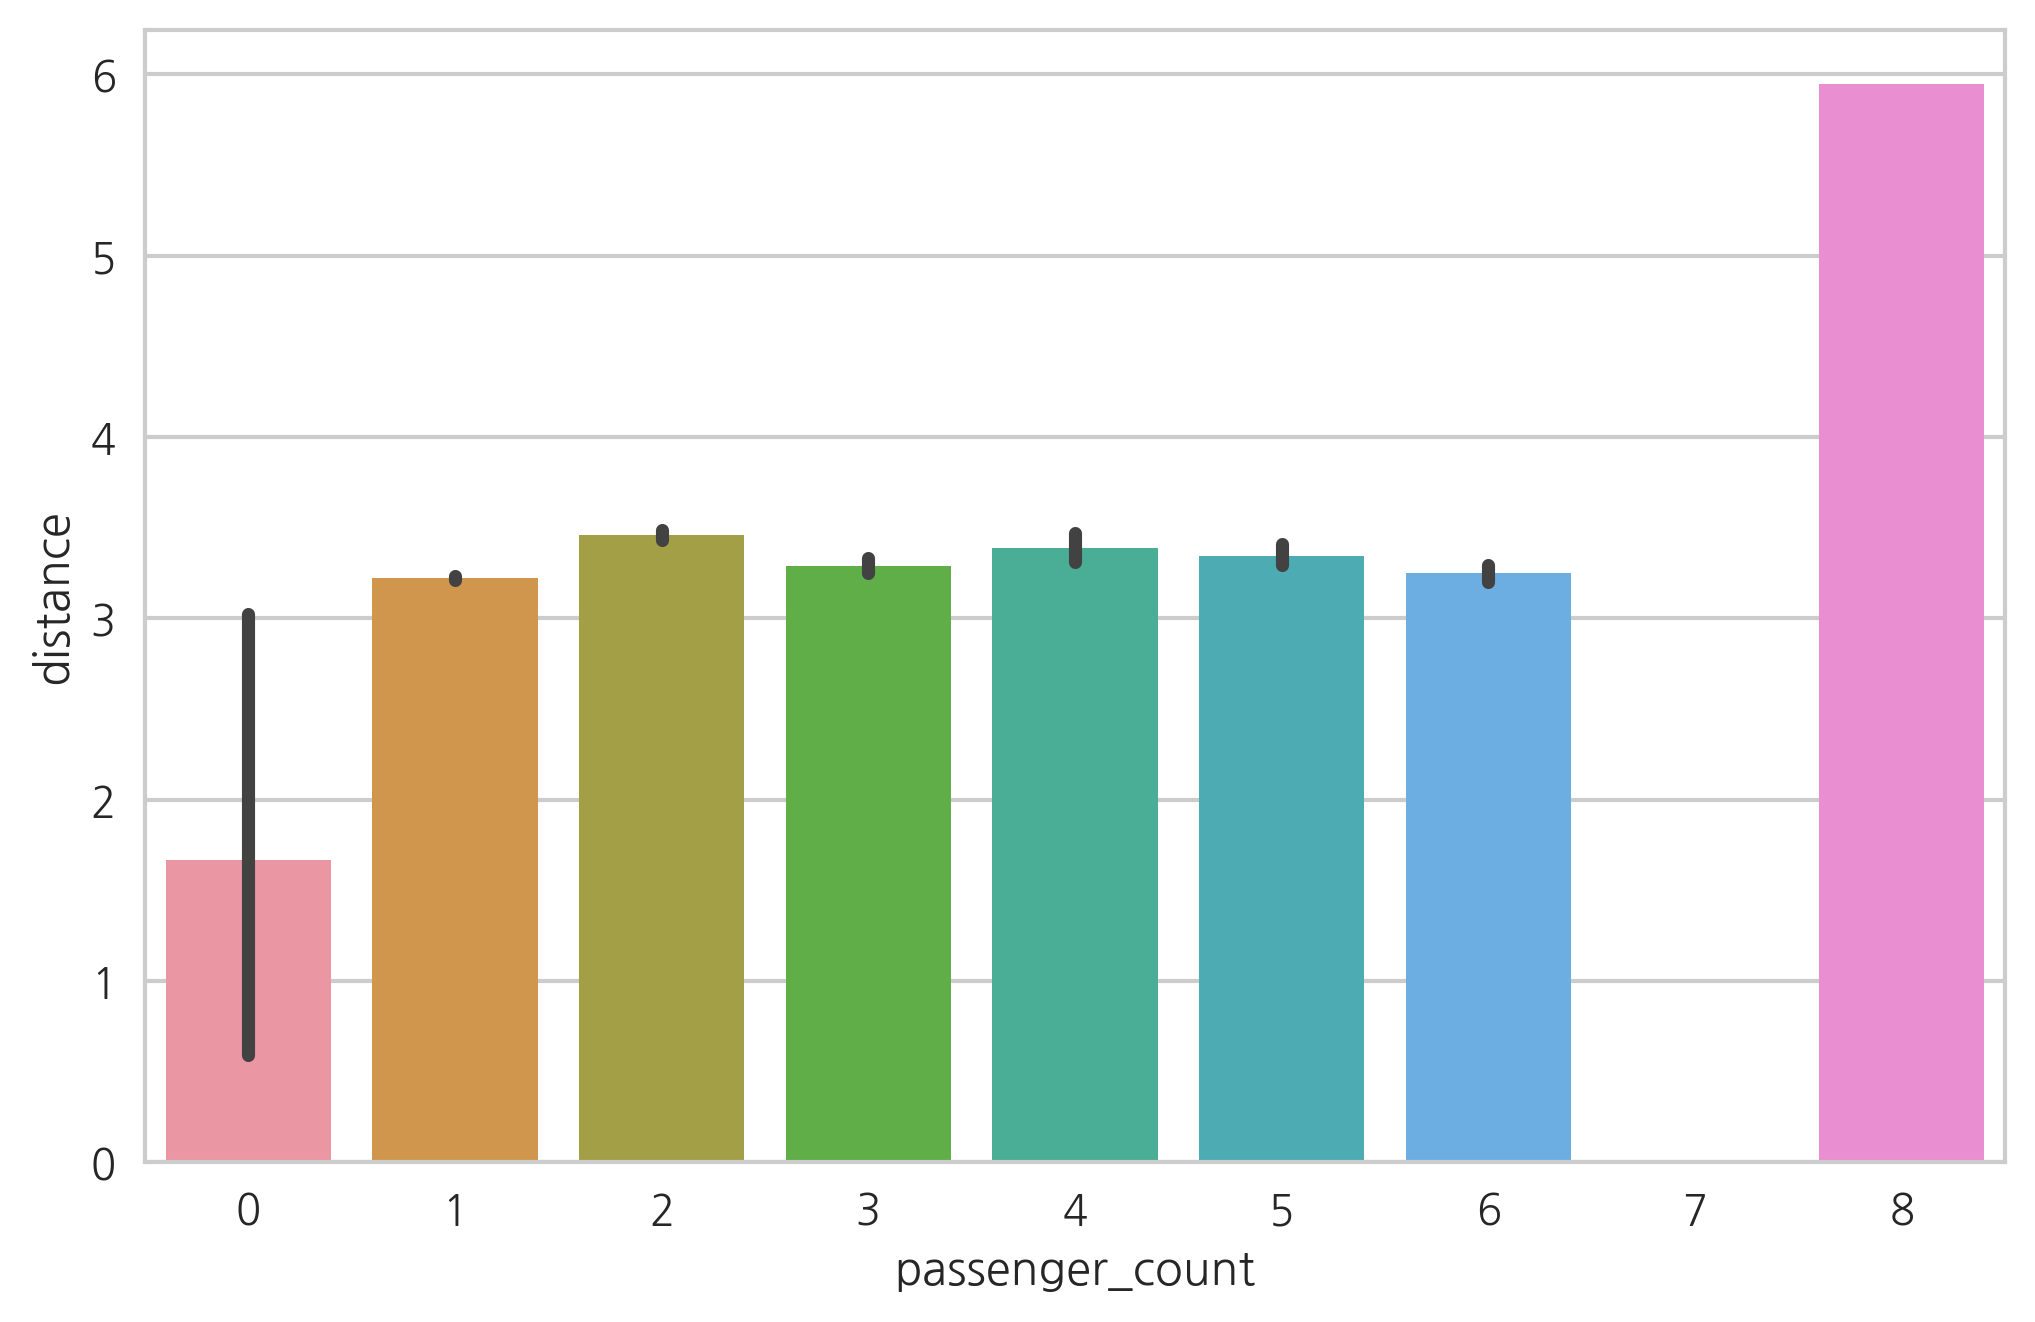

In [26]:
import seaborn as sns
#sns.set(style="ticks")
sel = df[['distance','passenger_count']]
sns.barplot(x='passenger_count',y='distance',data=sel)
#sns.despine(offset=10, trim=True)

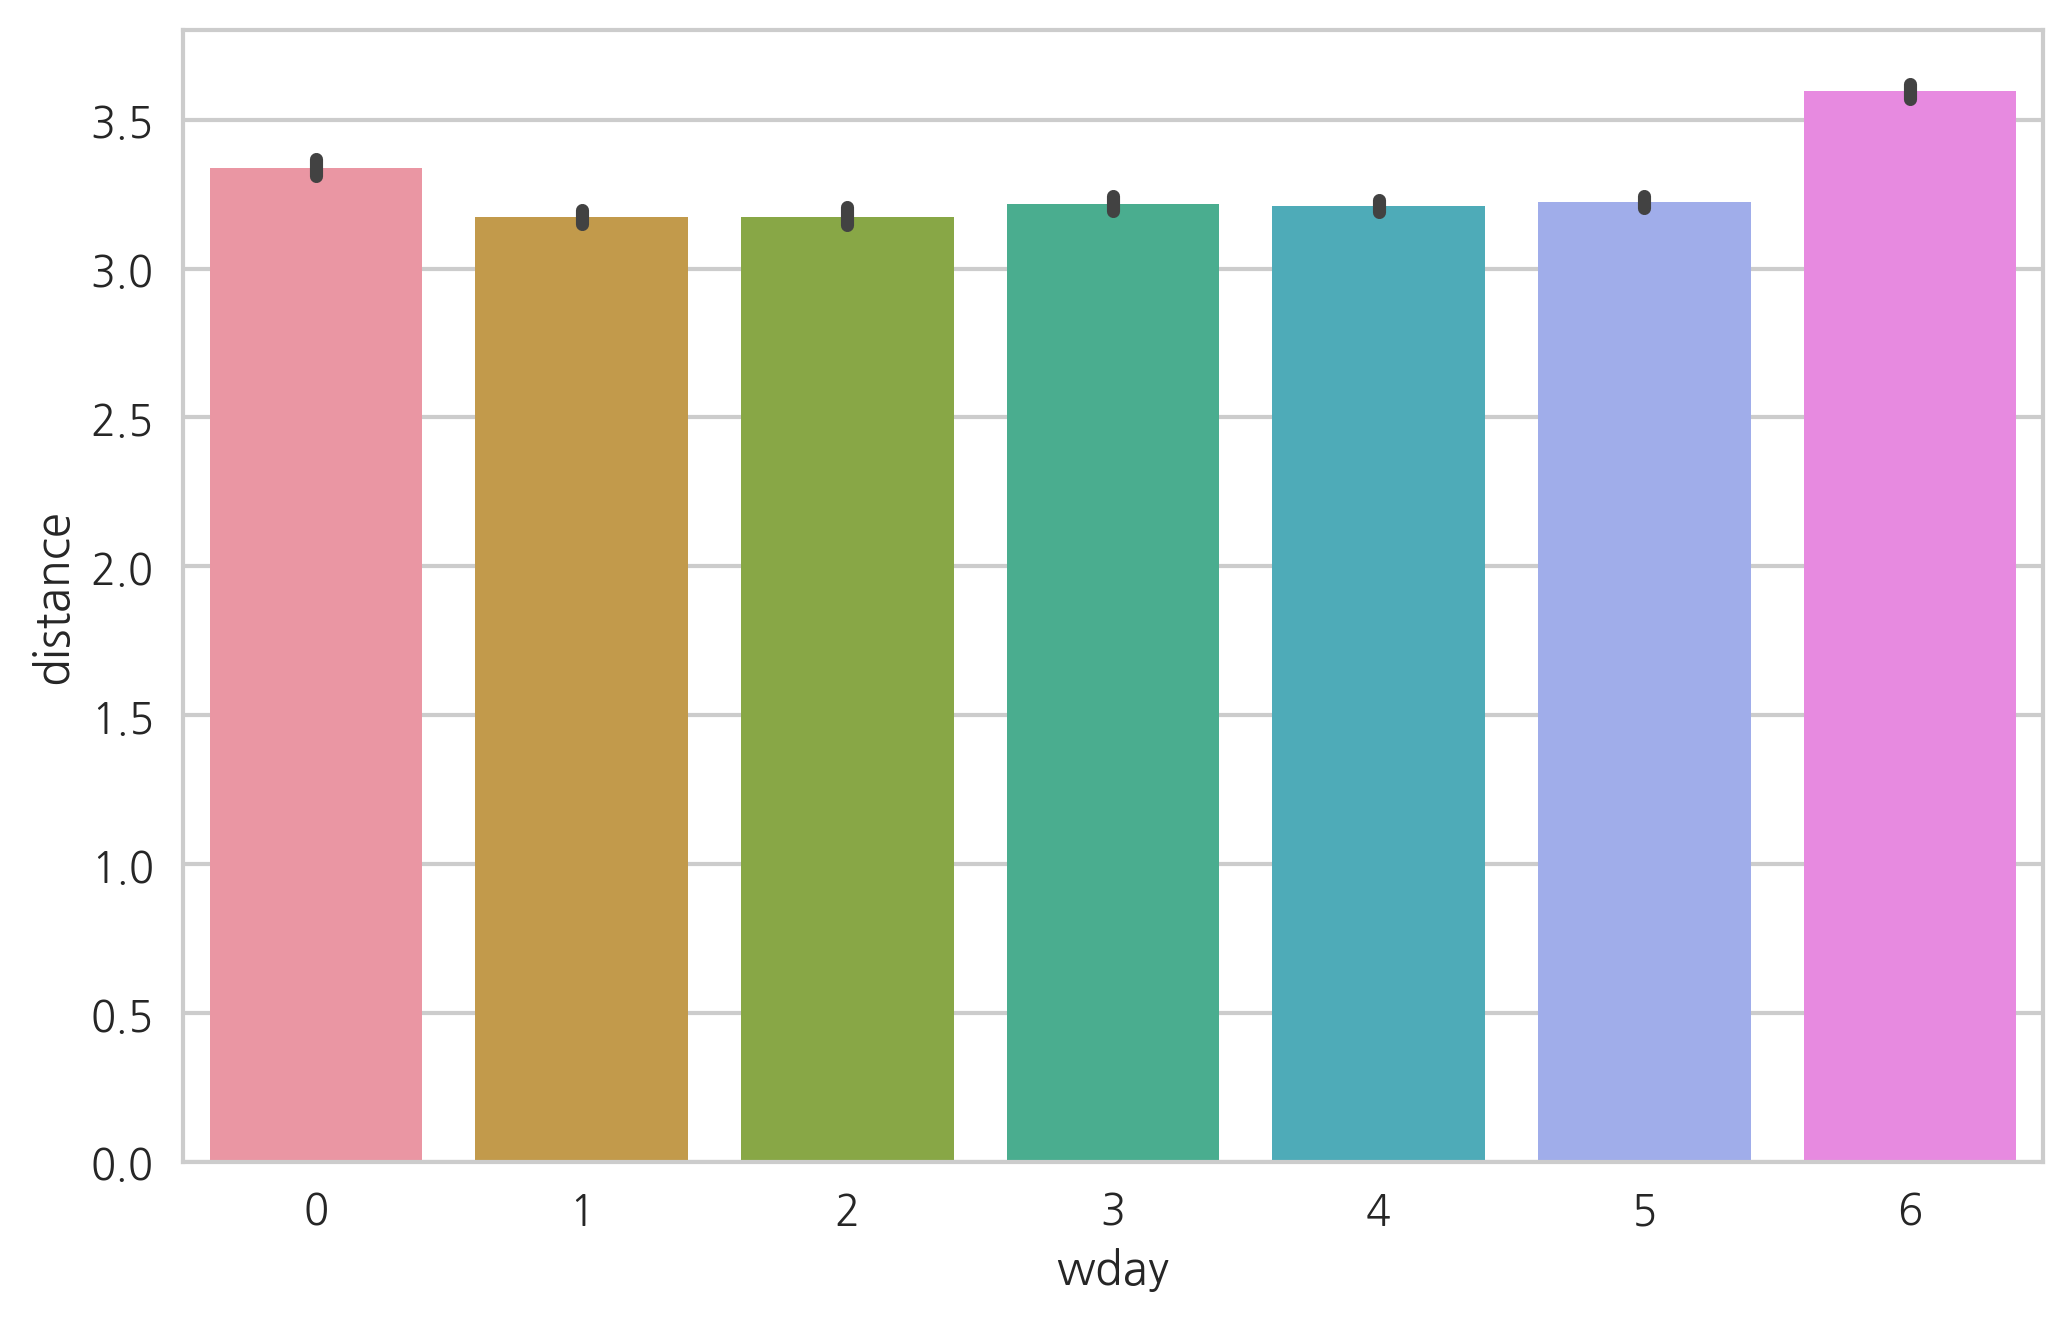

In [27]:
import seaborn as sns
#sns.set(style="ticks")
sel = df[['distance','wday']]
sns.barplot(x='wday',y='distance',data=sel)
#sns.despine(offset=10, trim=True)

## Attempting Regression

I am going to start with a linear regression model and I will make several attempts with base and engineered features.

In [28]:
features = df[['wday','yday','pu_hour','passenger_count','pickup_latitude','pickup_longitude','vendor_id']]
target = df[['trip_duration']]

In [29]:
from sklearn import linear_model
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

reg = linear_model.LinearRegression()
cv = ShuffleSplit(n_splits=4, test_size=0.3, random_state=0)
cross_val_score(reg, features, target, cv=cv)
#reg.fit (features, target)

array([ 0.09418797,  0.07367771,  0.09625835,  0.06991059])

In [30]:
reg = linear_model.Ridge (alpha = .5)
cv = ShuffleSplit(n_splits=4, test_size=0.3, random_state=0)
cross_val_score(reg, features, target, cv=cv)

array([ 0.09417169,  0.07369759,  0.09623659,  0.06992741])

In [31]:
reg.fit(features,target)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [32]:
tdf = pd.read_csv('test.csv')
tdf.pickup_datetime=pd.to_datetime(tdf.pickup_datetime)
#tdf.dropoff_datetime=pd.to_datetime(tdf.dropoff_datetime)
tdf['pu_hour'] = tdf.pickup_datetime.dt.hour
tdf['yday'] = tdf.pickup_datetime.dt.dayofyear
tdf['wday'] = tdf.pickup_datetime.dt.dayofweek

In [33]:
tfeatures = tdf[['wday','yday','pu_hour','passenger_count','pickup_latitude','pickup_longitude','vendor_id']]

In [34]:
pred = reg.predict(tfeatures)

In [35]:
tdf['trip_duration']=pred.astype(int)
out = tdf[['id','trip_duration']]

In [36]:
out['trip_duration'].isnull().values.any()

False

In [37]:
out.to_csv('pred_linear_1.csv',index=False)

This model performed very bad :( scoring only 0.808. Let's try something more sophisticated. We can identify clusters of pick up locations and use them to train the model.

##Creating Clusters

In [38]:
from sklearn.cluster import KMeans
import numpy as np
import pickle

try:
    kmeans = pickle.load(open("source_kmeans.pickle", "rb"))
except:
    kmeans = KMeans(n_clusters=20, random_state=0).fit(df[['pickup_longitude','pickup_latitude']])
    pickle.dump(kmeans, open('source_kmeans.pickle', 'wb'))

try:
    destkmeans = pickle.load(open("dest_kmeans.pickle", "rb"))
except:
    destkmeans = KMeans(n_clusters=20, random_state=0).fit(df[['dropoff_longitude','dropoff_latitude']])
    pickle.dump(destkmeans, open('dest_kmeans.pickle', 'wb'))


In [39]:
cx = [c[0] for c in kmeans.cluster_centers_]
cy = [c[1] for c in kmeans.cluster_centers_]

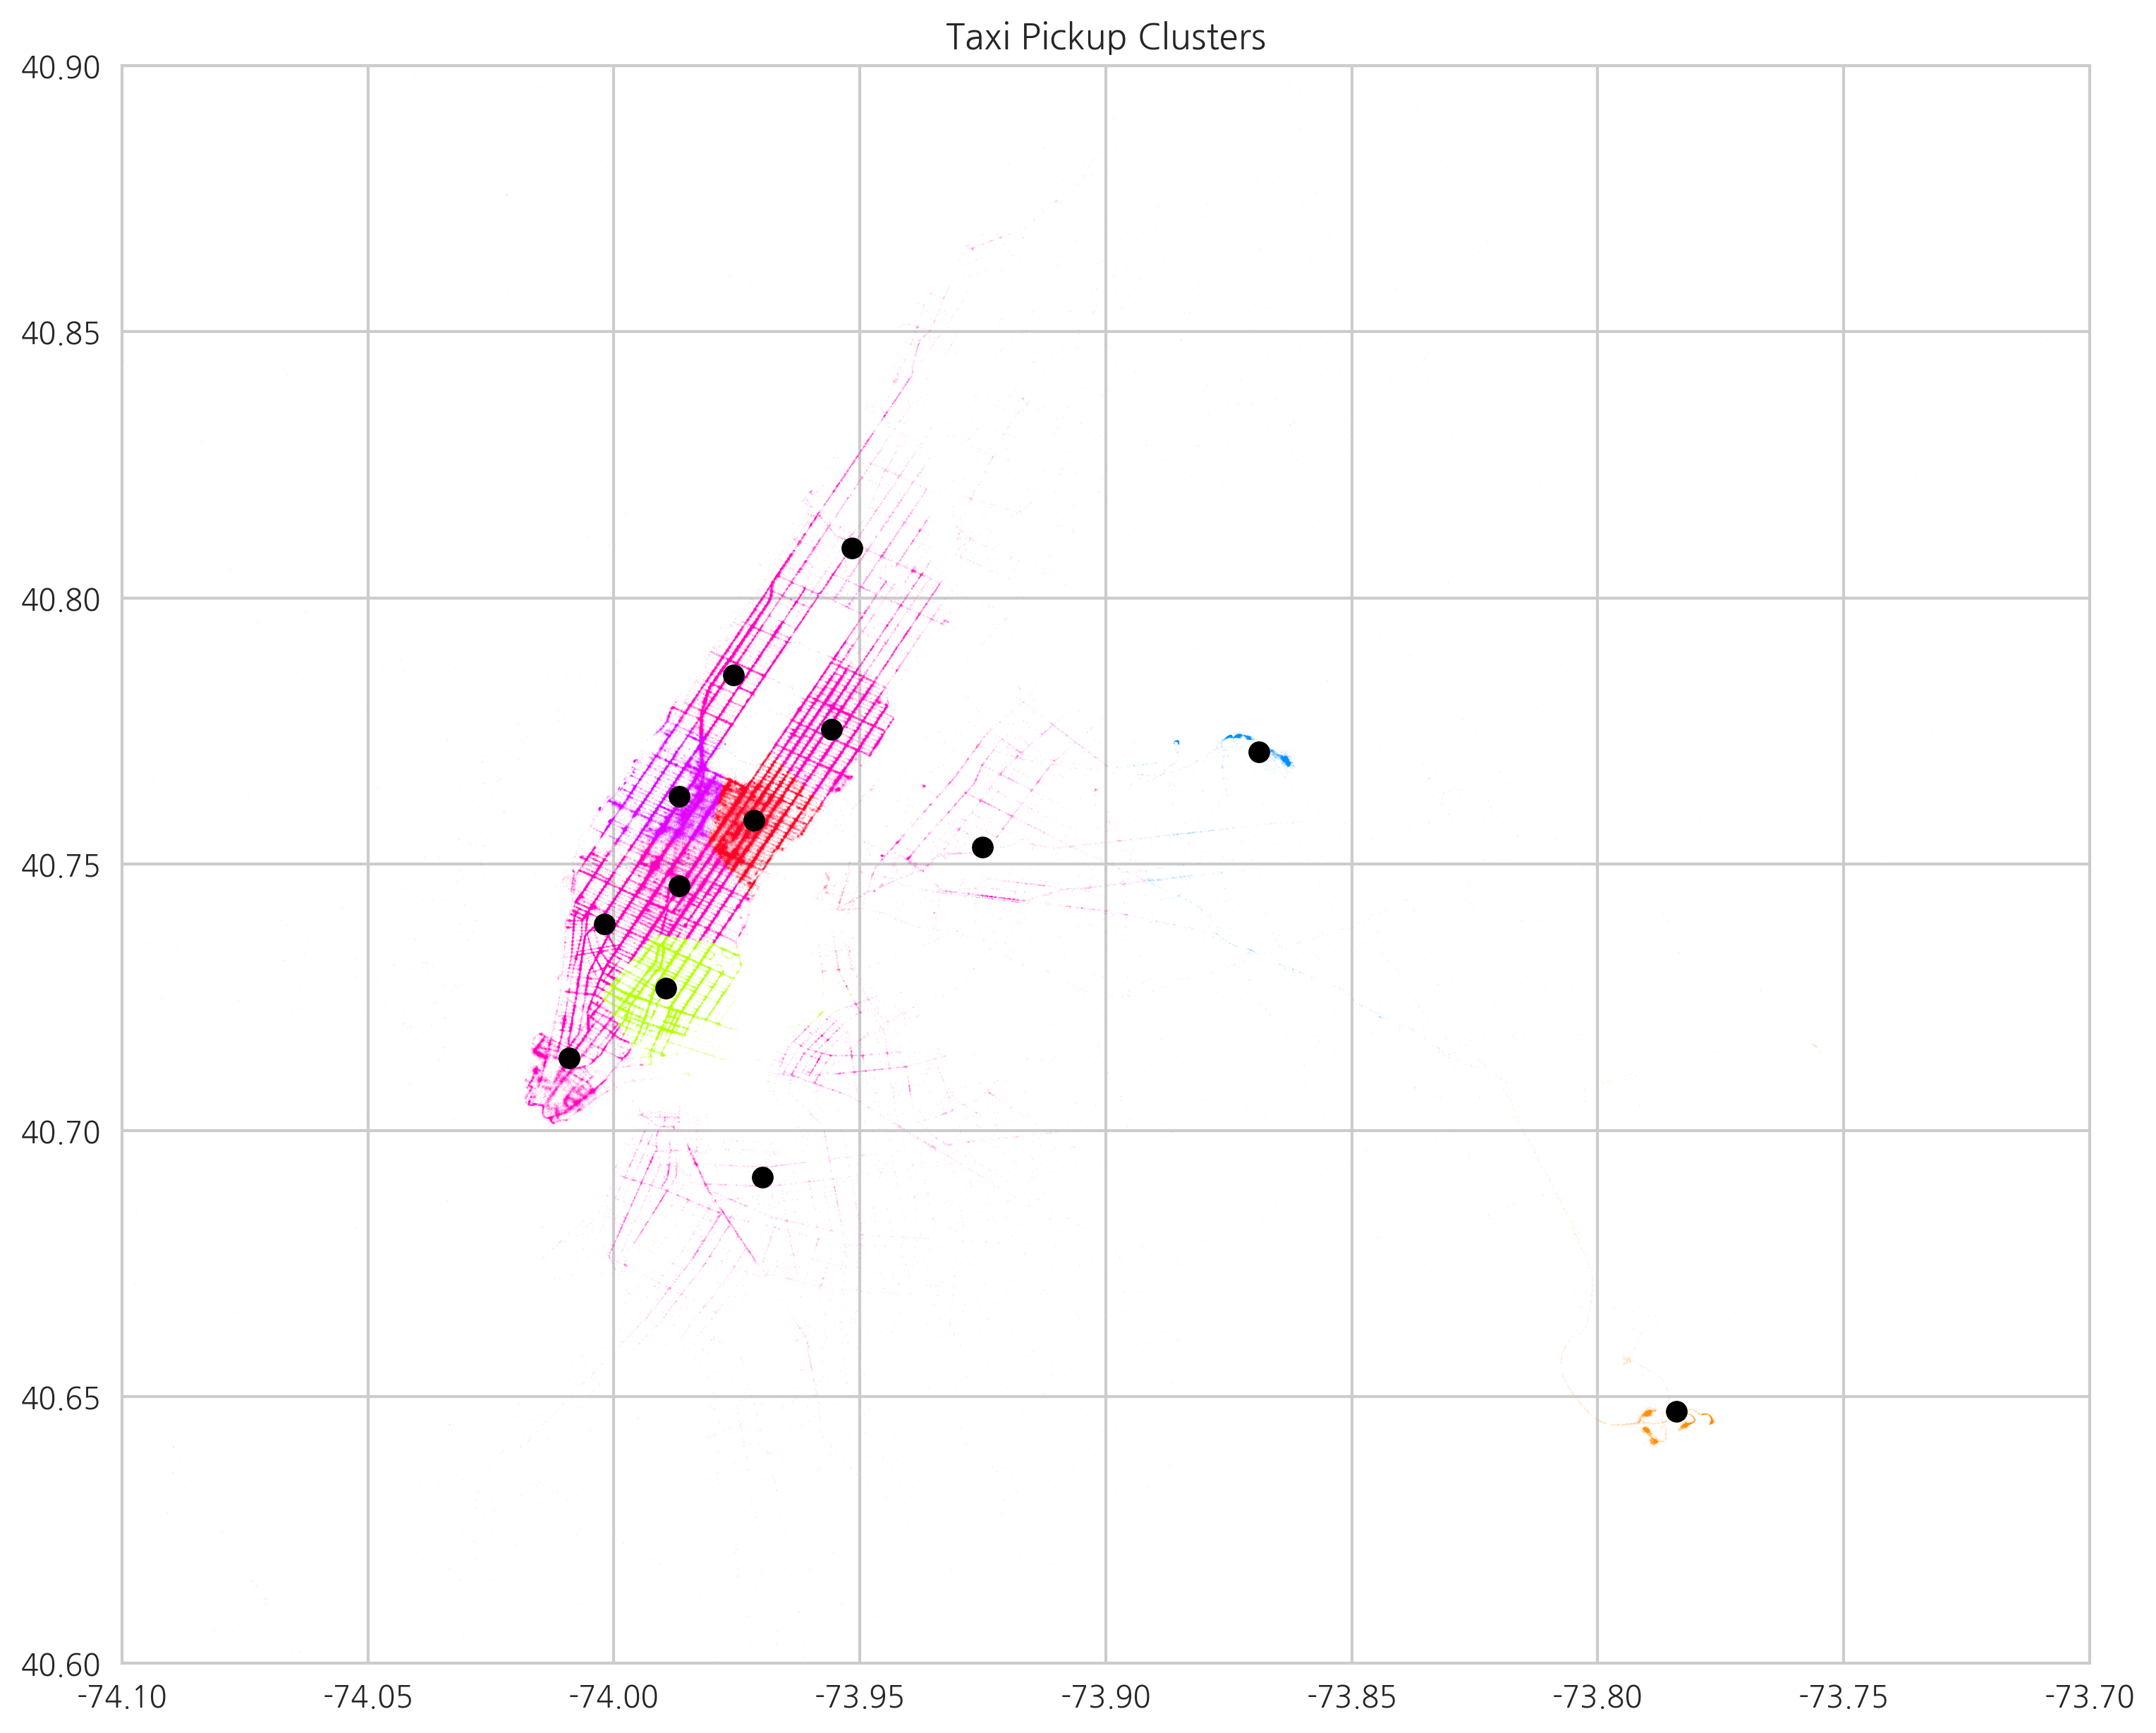

In [40]:
fig, ax = plt.subplots(ncols=1, nrows=1,figsize=(12,10))
plt.ylim(40.6, 40.9)
plt.xlim(-74.1,-73.7)

df['cluster'] = kmeans.predict(df[['pickup_longitude','pickup_latitude']])
df['dest_cluster'] = destkmeans.predict(df[['dropoff_longitude','dropoff_latitude']])
cm = plt.get_cmap('gist_rainbow')

colors = [cm(2.*i/15) for i in range(20)]
colored = [colors[k] for k in df['cluster']]

#plt.figure(figsize = (10,10))
ax.scatter(df.pickup_longitude,df.pickup_latitude,color=colored,s=0.0002,alpha=1)
ax.scatter(cx,cy,color='Black',s=50,alpha=1)
plt.title('Taxi Pickup Clusters')
plt.show()
#plt.ylim(40.6, 40.9)

#ax.scatter(sdf['pickup_longitude'],sdf['pickup_latitude'], s=0.1, alpha=1)
#ax.scatter(cx,cy,s=70,color='Red')

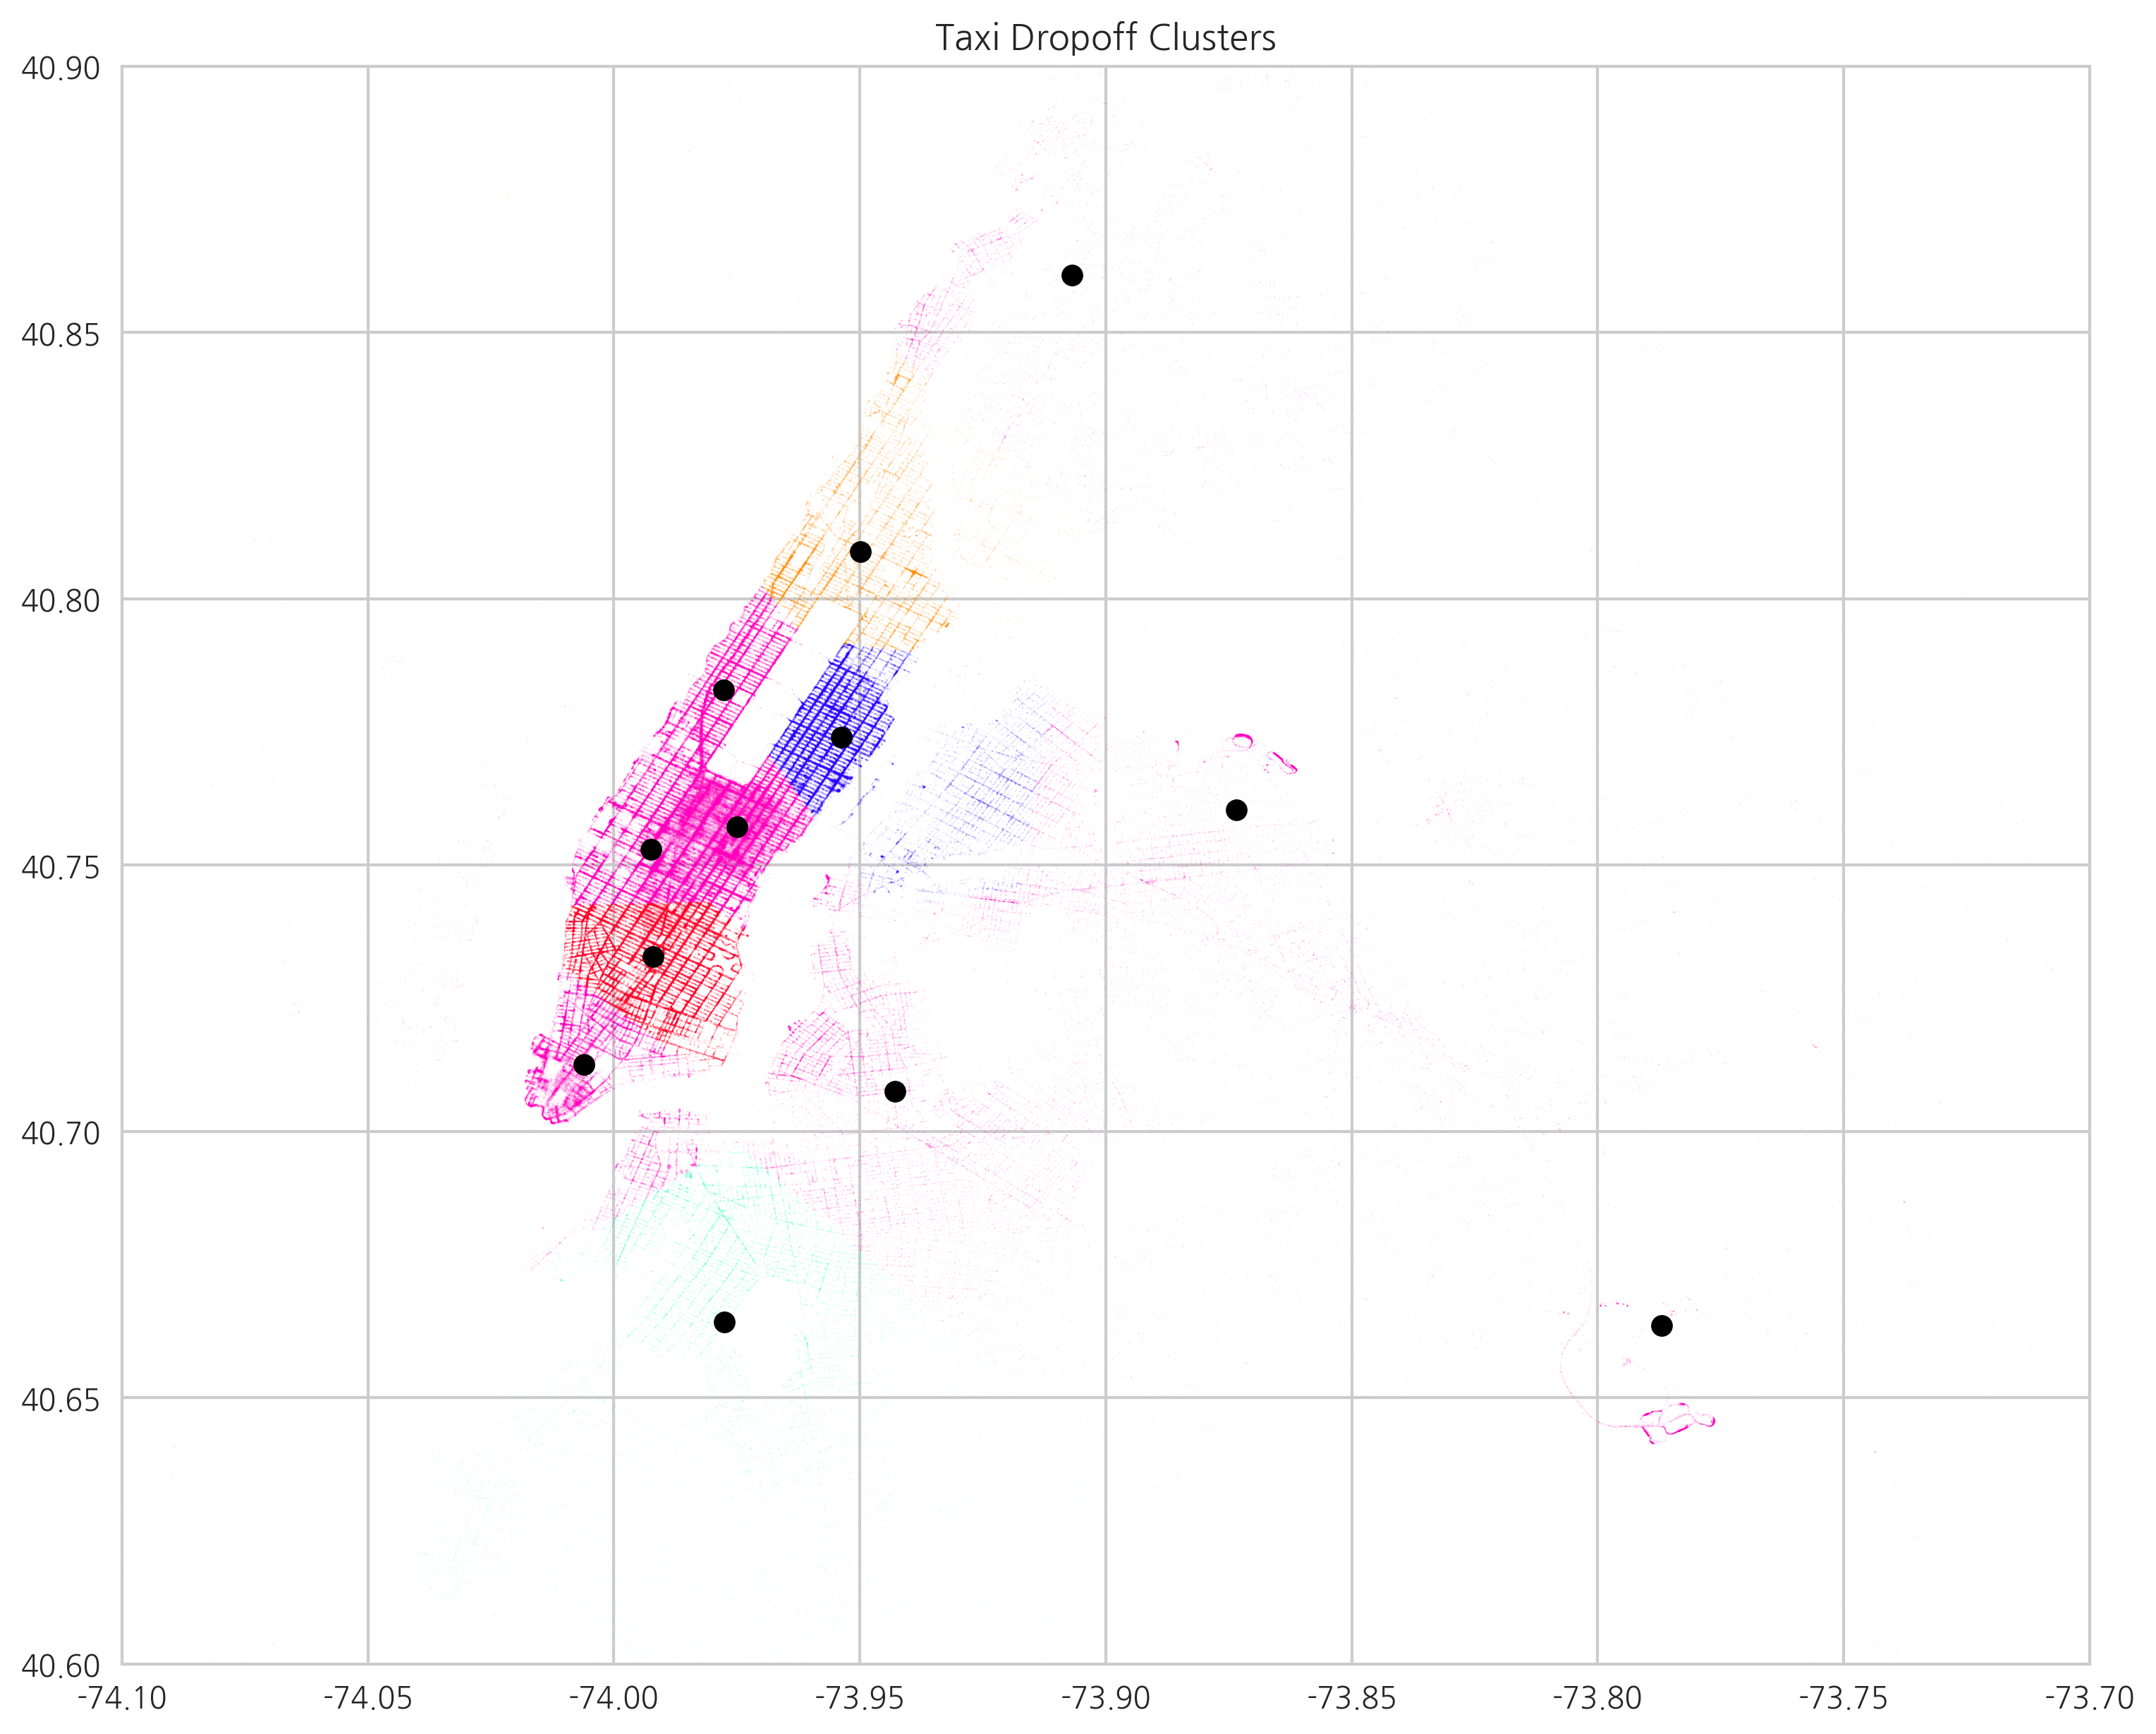

In [41]:
fig, ax = plt.subplots(ncols=1, nrows=1,figsize=(12,10))
plt.ylim(40.6, 40.9)
plt.xlim(-74.1,-73.7)

cx = [c[0] for c in destkmeans.cluster_centers_]
cy = [c[1] for c in destkmeans.cluster_centers_]

colors = [cm(2.*i/15) for i in range(20)]
colored = [colors[k] for k in df['dest_cluster']]

ax.scatter(df.dropoff_longitude,df.dropoff_latitude,color=colored,s=0.0002,alpha=1)
ax.scatter(cx,cy,color='Black',s=50,alpha=1)
plt.title('Taxi Dropoff Clusters')
plt.show()

In [42]:
df.head()
features = df[['wday','yday','pu_hour','passenger_count','cluster','vendor_id','dest_cluster']]
target = df[['trip_duration']]

In [ ]:
from sklearn import linear_model
import xgboost
reg = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

reg.fit(features,target)

/home/dockeruser/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [39]:
tdf = pd.read_csv('test.csv')
tdf['cluster'] = kmeans.predict(tdf[['pickup_longitude','pickup_latitude']])
tdf['dest_cluster'] = destkmeans.predict(tdf[['dropoff_longitude','dropoff_latitude']])
tdf.pickup_datetime=pd.to_datetime(tdf.pickup_datetime)
#tdf.dropoff_datetime=pd.to_datetime(tdf.dropoff_datetime)
tdf['pu_hour'] = tdf.pickup_datetime.dt.hour
tdf['yday'] = tdf.pickup_datetime.dt.dayofyear
tdf['wday'] = tdf.pickup_datetime.dt.dayofweek
tfeatures = tdf[['wday','yday','pu_hour','passenger_count','cluster','vendor_id','dest_cluster']]
pred = reg.predict(tfeatures)

In [40]:
tdf['trip_duration']=pred.astype(int)
out = tdf[['id','trip_duration']]
out['trip_duration'].isnull().values.any()
out.to_csv('pred_linear_2_clusters.csv',index=False)

I have added both the pickup and dropoff clusters which is very unfair with respect to the first model since the dropoff information is obviously correlated with the duration.
This model scored 0.621. 
Now I am going to us weather conditions

##Weather Doesn't Matter

In [41]:
features = df[['wday','yday','pu_hour','passenger_count','cluster','vendor_id','dest_cluster','H','L','M','V','snow fall']]
target = df[['trip_duration']]

In [ ]:
reg = xgboost.XGBRegressor(n_estimators=200, min_child_weight=150, gamma=0, subsample=0.75,
                           colsample_bytree=0.4, max_depth=10)

reg.fit(features,target)

In [ ]:
tdf = pd.merge(tdf,wdf,on='yday')
tdf.head()

In [ ]:
rain_dummies = pd.get_dummies(tdf['precipitation'])
tdf = pd.concat([tdf, rain_dummies], axis=1)
tdf = tdf.drop(['precipitation'],axis=1)
tfeatures = tdf[['wday','yday','pu_hour','passenger_count','cluster','vendor_id','dest_cluster','H','L','M','V','snow fall']]

pred = reg.predict(tfeatures)

In [ ]:
pred = reg.predict(tfeatures)

In [ ]:
tdf['trip_duration']=pred.astype(int)
out = tdf[['id','trip_duration']]
out['trip_duration'].isnull().values.any()
out.to_csv('pred_3_clusters_weather.csv',index=False)